In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *

In [3]:
CYCLE_LENGTH = 10 # length of the cycles to fit onto the graph

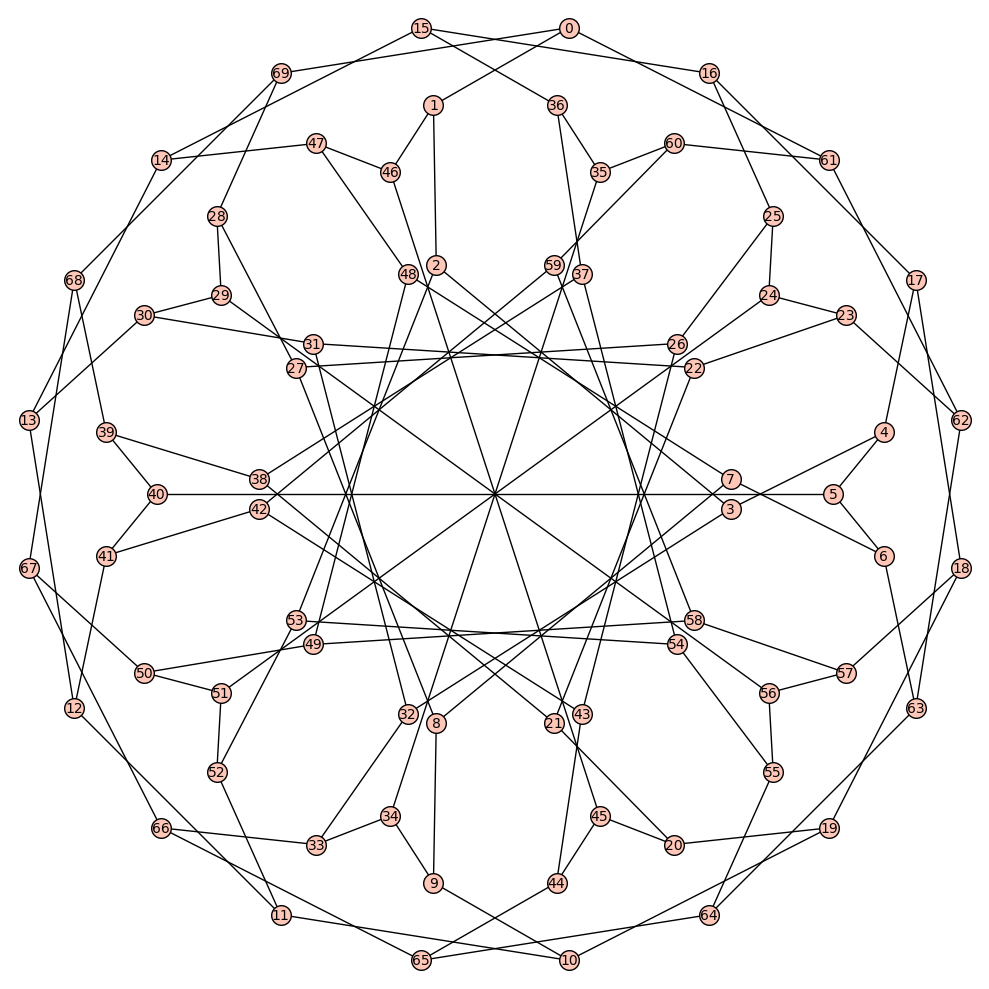

In [2]:
graphs.Balaban10Cage(embedding=1).show(figsize=(10,10))

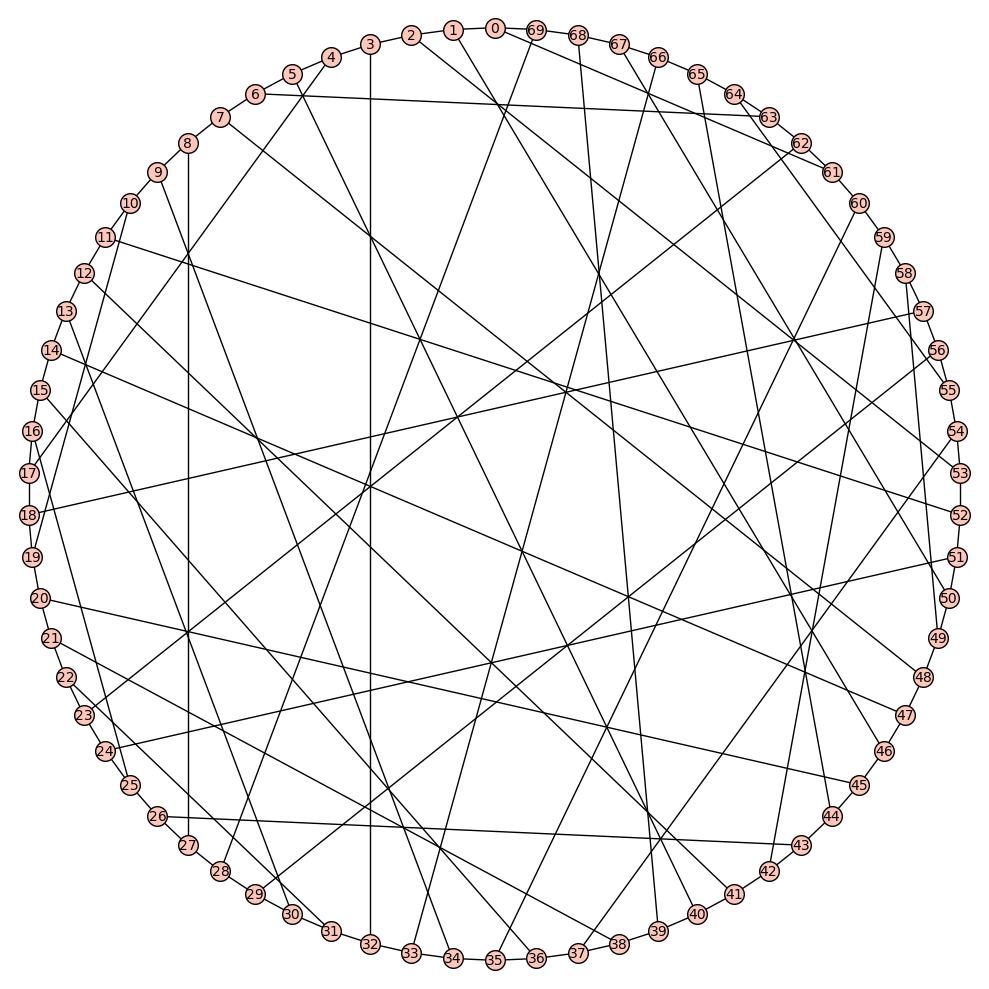

In [56]:
# instantiate a balaban 10-cage
g = graphs.Balaban10Cage(embedding=2)
g.show(figsize=(10,10))

In [6]:
# get the edges of the graph
NUM_EDGES = len(g.edges())
NUM_VERTICES = len(g.vertices())
print("NUM_EDGES", NUM_EDGES)
print("CYCLES TO FIT", 2 * NUM_EDGES / CYCLE_LENGTH)
print("NUM_VERTICES", NUM_VERTICES)

NUM_EDGES 105
CYCLES TO FIT 21
NUM_VERTICES 70


In [7]:
# convert edges list to adjacency list
adjacency_list = [[] for _ in range(NUM_VERTICES)]
for e in g.edges():
    adjacency_list[e[0]].append(e[1])
    adjacency_list[e[1]].append(e[0])
adjacency_list

[[1, 69, 61],
 [0, 2, 46],
 [1, 3, 53],
 [2, 32, 4],
 [3, 17, 5],
 [4, 6, 40],
 [5, 7, 63],
 [6, 48, 8],
 [7, 9, 27],
 [8, 34, 10],
 [9, 19, 11],
 [10, 52, 12],
 [11, 41, 13],
 [12, 30, 14],
 [13, 15, 47],
 [14, 16, 36],
 [15, 17, 25],
 [4, 16, 18],
 [17, 19, 57],
 [10, 18, 20],
 [19, 21, 45],
 [20, 38, 22],
 [21, 23, 31],
 [22, 24, 62],
 [23, 51, 25],
 [16, 24, 26],
 [25, 43, 27],
 [8, 26, 28],
 [27, 69, 29],
 [28, 56, 30],
 [13, 29, 31],
 [22, 30, 32],
 [3, 31, 33],
 [32, 34, 66],
 [9, 33, 35],
 [34, 36, 60],
 [15, 35, 37],
 [36, 38, 54],
 [21, 37, 39],
 [38, 68, 40],
 [5, 39, 41],
 [12, 40, 42],
 [41, 43, 59],
 [26, 42, 44],
 [43, 65, 45],
 [20, 44, 46],
 [1, 45, 47],
 [14, 46, 48],
 [7, 47, 49],
 [48, 50, 58],
 [49, 67, 51],
 [24, 50, 52],
 [11, 51, 53],
 [2, 52, 54],
 [37, 53, 55],
 [54, 64, 56],
 [29, 55, 57],
 [18, 56, 58],
 [49, 57, 59],
 [42, 58, 60],
 [35, 59, 61],
 [0, 60, 62],
 [23, 61, 63],
 [6, 62, 64],
 [55, 63, 65],
 [44, 64, 66],
 [33, 65, 67],
 [50, 66, 68],
 [39, 67,

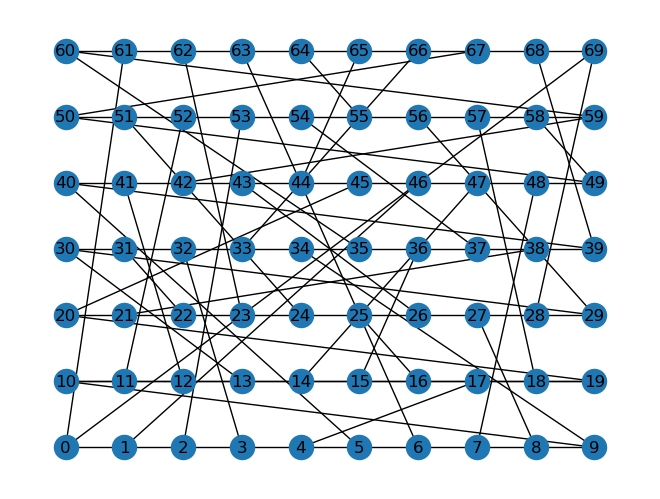

In [32]:
# visualize adjacency list with networkx
G = nx.Graph()
for i in range(NUM_VERTICES):
    G.add_node(i)
for i in range(NUM_VERTICES):
    for j in adjacency_list[i]:
        G.add_edge(i, j)
pos = {}
for i in range(NUM_VERTICES):
    pos[i] = (i % CYCLE_LENGTH, i // CYCLE_LENGTH)
nx.draw(G, pos, with_labels=True)
plt.show()

In [33]:
# save to adjacency_list.txt
with open('adjacency_list.txt', 'w') as f:
    f.write(f'{NUM_VERTICES} {NUM_EDGES}\n')
    for i in range(NUM_VERTICES):
        f.write(f'{" ".join(map(str, adjacency_list[i]))}\n')

In [34]:
# generate all cycles of length CYCLE_LENGTH starting at vertex 0
cycles = [ c for c in g.to_directed().all_simple_cycles(starting_vertices=[0],max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]
print(len(cycles))

78


In [35]:
cycles[0]

[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]

In [36]:
# make sure we are including cycles in both directions
for c in cycles:
    assert list(reversed(c)) in cycles

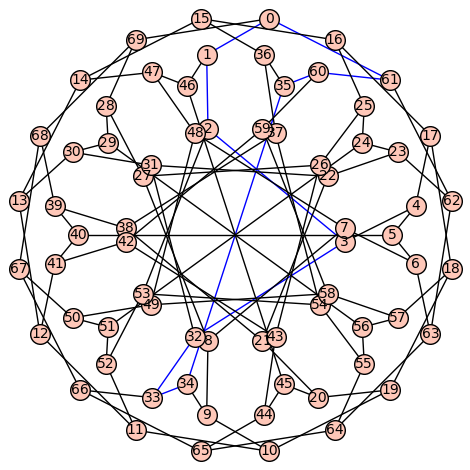

In [37]:
# visualize the first cycle using sage
def visualize(cycle, g):
    for e in g.edges():
        try:
            i = cycle[:-1].index(e[0])
            j = cycle[:-1].index(e[1])

            if abs(i - j) == 1 or abs(i - j) == 9:
                g.set_edge_label(e[0], e[1], 1) # in cycle
            else:
                g.set_edge_label(e[0], e[1], 0) # not in cycle
        except ValueError:
            g.set_edge_label(e[0], e[1], 0) # not in cycle
    g.plot(edge_colors=g._color_by_label({1: "blue", 0: "black"})).show()

visualize(cycles[0], g)

In [38]:
# uncomment to print out all cycles from starting vertex 0 to manually inspect
# for cycle in undirected_cycles:
#     visualize(cycle, g)

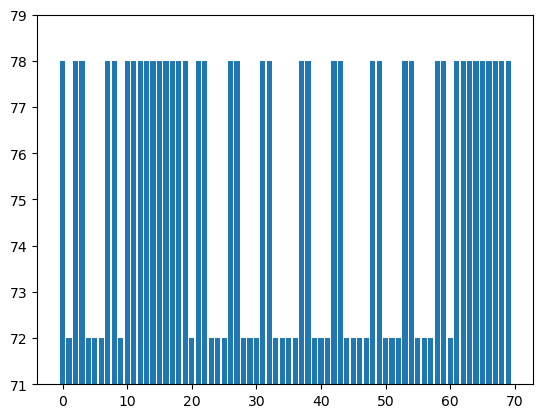

In [39]:
# plot number of CYCLE_LENGTH length cycles containing each vertex
num_cycles_by_vertex = [0] * NUM_VERTICES
# with open('cycles_by_vertex.txt', 'w') as f:
cycles_by_vertex = []
for v in g.vertices():
    cycles = [ c for c in g.to_directed().all_simple_cycles(starting_vertices=[v],max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]
    num_cycles_by_vertex[v] = len(cycles)
    cycles_by_vertex.append(cycles)
    # f.write(f'{max(num_cycles_by_vertex)}\n')
    # for cycles in cycles_by_vertex:
    #     f.write(f'{len(cycles)}:')
    #     for c in cycles:
    #         f.write(f'{" ".join(map(str, c))};')
    #     f.write('\n')

plt.bar(range(NUM_VERTICES), num_cycles_by_vertex)
plt.ylim(min(num_cycles_by_vertex) - 1, max(num_cycles_by_vertex) + 1)
plt.show()

In [8]:
# save all CYCLE_LENGTH length cycles to ten_cycles.txt
with open('cycles.txt', 'w') as f:
    cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]
    f.write(f'{CYCLE_LENGTH} {len(cycles)}\n')
    for c in cycles:
        f.write(f'{" ".join(map(str, c))}\n')
    print(len(cycles))

528


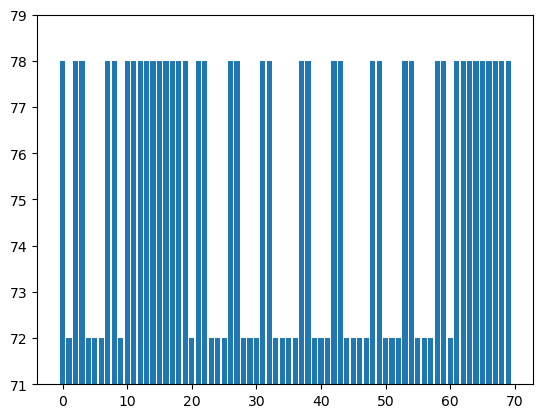

In [9]:
# organize cycles by vertex
cycles_by_vertex = [[] for _ in range(NUM_VERTICES)]
for i, c in enumerate(cycles):
    for v in c[:-1]:
        cycles_by_vertex[v].append(i)

with open('cycles_by_vertex.txt', 'w') as f:
    f.write(f'{max([len(c) for c in cycles_by_vertex])}\n')
    for vertex_cycles in cycles_by_vertex:
        f.write(f'{len(vertex_cycles)} ')
        for c in vertex_cycles:
            f.write(f'{c} ')
        f.write('\n')

# plot as bar graph
plt.bar(range(NUM_VERTICES), [len(c) for c in cycles_by_vertex])
plt.ylim(min([len(c) for c in cycles_by_vertex]) - 1, max([len(c) for c in cycles_by_vertex]) + 1)
plt.show()

In [77]:
# check if 21 10-cycles are enough to cover the graph (use each directed edge exactly once)
# only works for CYCLE_LENGTH = 10
from copy import deepcopy
VERTEX_USE_LIMIT = 3
max_used_cycles = 0

def x_in_y(query, base):
    try:
        l = len(query)
    except TypeError:
        l = 1
        query = type(base)((query,))

    for i in range(len(base)):
        if base[i:i+l] == query:
            return True
    return False

def ijkgood(c, solution):
    c = c.copy() + [c[1]]
    for i in range(CYCLE_LENGTH):
        for c2 in solution:
            c2 = c2.copy() + [c2[1]]
            if x_in_y([c[i + 2], c[i + 1], c[i]], c2):
                return False
    return True

def search(used_cycles, vertex_uses, adj_list) -> bool:
    TARGET = 2 * NUM_EDGES // CYCLE_LENGTH

    global max_used_cycles
    if len(used_cycles) > max_used_cycles:
        print(f"New max used cycles: {len(used_cycles)}:")
        max_used_cycles = len(used_cycles)
        for c in used_cycles:
            print(cycles[c])
    
    # most used vertex not at limit
    vertex = vertex_uses.index(max(filter(lambda x: x < VERTEX_USE_LIMIT, vertex_uses)))

    for i in cycles_by_vertex[vertex]:
        if i in used_cycles:
            continue

        cycle = cycles[i]

        edges_available = True
        for j in range(CYCLE_LENGTH):
            if cycle[j + 1] not in adj_list[cycle[j]]:
                edges_available = False
                break
        if not edges_available:
            continue

        if not ijkgood(cycle, [cycles[c] for c in used_cycles]):
            continue

        if len(used_cycles) == TARGET - 1:
            return True

        used_cycles_cpy = used_cycles.copy()
        used_cycles_cpy.add(i)

        adj_list_cpy = deepcopy(adj_list)
        for j in range(CYCLE_LENGTH):
            adj_list_cpy[cycle[j]].remove(cycle[j + 1])

        vertex_uses_cpy = vertex_uses.copy()
        for j in cycle[:-1]:
            vertex_uses_cpy[j] += 1

        if search(used_cycles_cpy, vertex_uses_cpy, adj_list_cpy):
            return True
    
    return False

for c in cycles:
    adj_list = deepcopy(adjacency_list)
    used_cycles = set()
    used_cycles.add(cycles.index(c))
    vertex_uses = [0] * NUM_VERTICES
    for v in c[:-1]:
        vertex_uses[v] = 1
    for i in range(CYCLE_LENGTH):
        adj_list[c[i]].remove(c[i + 1])

    if search(used_cycles, vertex_uses, adj_list):
        print("Found solution:")
        for c in used_cycles:
            print(cycles[c])

New max used cycles: 1:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
New max used cycles: 2:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
New max used cycles: 3:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
New max used cycles: 4:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
New max used cycles: 5:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
[1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1]
[2, 53, 54, 37, 36, 15, 16, 17, 4, 3, 2]
New max used cycles: 6:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
[3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3]
[1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1]
[2, 53, 54, 37, 36, 15, 1

In [13]:
solution = [
    [9, 10, 19, 18, 57, 58, 59, 60, 35, 34, 9],
    [0, 69, 68, 39, 38, 37, 36, 35, 60, 61, 0],
    [2, 53, 52, 51, 24, 25, 16, 17, 4, 3, 2],
    [0, 1, 2, 3, 32, 31, 30, 29, 28, 69, 0],
    [4, 17, 18, 19, 20, 21, 38, 39, 40, 5, 4],
    [1, 46, 47, 14, 15, 36, 37, 54, 53, 2, 1],
    [5, 40, 41, 12, 13, 14, 47, 48, 7, 6, 5],
    [7, 48, 49, 50, 51, 52, 11, 10, 9, 8, 7],
    [11, 52, 53, 54, 55, 56, 29, 30, 13, 12, 11],
    [10, 11, 12, 41, 42, 43, 44, 45, 20, 19, 10],
    [0, 61, 62, 23, 22, 21, 20, 45, 46, 1, 0],
    [3, 4, 5, 6, 63, 64, 65, 66, 33, 32, 3],
    [6, 7, 8, 27, 26, 25, 24, 23, 62, 63, 6],
    [8, 9, 34, 33, 66, 67, 68, 69, 28, 27, 8],
]

In [ ]:
adj_list = deepcopy(adjacency_list)
used_cycles = set()

max_used_cycles = 0
def search_complete(used_cycles, adj_list):
    TARGET = 2 * NUM_EDGES // CYCLE_LENGTH
    if len(used_cycles) == TARGET:
        return True
    
    global max_used_cycles
    if len(used_cycles) > max_used_cycles:
        print(f"New max used cycles: {len(used_cycles)}:")
        max_used_cycles = len(used_cycles)
        for c in used_cycles:
            print(cycles[c])

    for i, c in enumerate(cycles):
        if i in used_cycles:
            continue

        edges_available = True
        for j in range(len(c) - 1):
            if c[j + 1] not in adj_list[c[j]]:
                edges_available = False
                break
        if not edges_available:
            continue

        if not ijkgood(c, [cycles[i] for i in used_cycles]):
            continue

        used_cycles_cpy = used_cycles.copy()
        used_cycles_cpy.add(i)

        adj_list_cpy = deepcopy(adj_list)
        for j in range(len(c) - 1):
            adj_list_cpy[c[j]].remove(c[j + 1])

        if search_complete(used_cycles_cpy, adj_list_cpy):
            return True
    
    return False

search_complete(used_cycles, adj_list)

In [39]:
cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=17) if len(c) > 10]

In [40]:
# sort cycles by ascending length
cycles.sort(key=lambda x: len(x))

In [41]:
cycles_by_vertex = [[] for _ in range(NUM_VERTICES)]
for i, c in enumerate(cycles):
    for v in c[:-1]:
        cycles_by_vertex[v].append(i)

In [51]:
from copy import deepcopy
VERTEX_USE_LIMIT = 3
max_used_cycles = 0

def x_in_y(query, base):
    try:
        l = len(query)
    except TypeError:
        l = 1
        query = type(base)((query,))

    for i in range(len(base)):
        if base[i:i+l] == query:
            return True
    return False

def ijkgood(c, solution):
    c = c.copy() + [c[1]]
    for i in range(len(c) - 2):
        for c2 in solution:
            c2 = c2.copy() + [c2[1]]
            if x_in_y([c[i + 2], c[i + 1], c[i]], c2):
                return False
    return True

def search(used_cycles, vertex_uses, adj_list) -> bool:
    TARGET = 2 * NUM_EDGES // CYCLE_LENGTH

    global max_used_cycles
    if len(used_cycles) > max_used_cycles:
        print(f"New max used cycles: {len(used_cycles)}:")
        max_used_cycles = len(used_cycles)
        for c in used_cycles:
            print(cycles[c])
    
    # most used vertex not at limit
    m = list(filter(lambda x: x < VERTEX_USE_LIMIT, vertex_uses))
    if not m:
        return False
    vertex = vertex_uses.index(max(m))

    for i in cycles_by_vertex[vertex]:
        if i in used_cycles:
            continue

        cycle = cycles[i]

        edges_available = True
        for j in range(len(cycle) - 1):
            if cycle[j + 1] not in adj_list[cycle[j]]:
                edges_available = False
                break
        if not edges_available:
            continue

        if not ijkgood(cycle, [cycles[c] for c in used_cycles]):
            continue

        if len(used_cycles) == TARGET - 1:
            return True

        used_cycles_cpy = used_cycles.copy()
        used_cycles_cpy.add(i)

        adj_list_cpy = deepcopy(adj_list)
        for j in range(len(cycle) - 1):
            adj_list_cpy[cycle[j]].remove(cycle[j + 1])

        vertex_uses_cpy = vertex_uses.copy()
        for j in cycle[:-1]:
            vertex_uses_cpy[j] += 1

        if search(used_cycles_cpy, vertex_uses_cpy, adj_list_cpy):
            return True
    
    return False

for c in cycles[:528]:
    print("Trying cycle:", c)
    adj_list = deepcopy(adjacency_list)
    used_cycles = set()
    used_cycles.add(cycles.index(c))
    vertex_uses = [0] * NUM_VERTICES
    for v in c[:-1]:
        vertex_uses[v] = 1
    for i in range(len(c) - 1):
        adj_list[c[i]].remove(c[i + 1])

    if search(used_cycles, vertex_uses, adj_list):
        print("Found solution:")
        for c in used_cycles:
            print(cycles[c])

Trying cycle: [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
New max used cycles: 1:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
New max used cycles: 2:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
New max used cycles: 3:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
New max used cycles: 4:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
New max used cycles: 5:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
[1, 46, 45, 20, 19, 10, 11, 52, 53, 2, 1]
[2, 53, 54, 37, 36, 15, 16, 17, 4, 3, 2]
New max used cycles: 6:
[0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0]
[0, 61, 62, 63, 64, 65, 66, 67, 68, 69, 0]
[0, 69, 28, 29, 30, 13, 14, 47, 46, 1, 0]
[3, 4, 5, 40, 41, 12, 13, 30, 31, 32, 3]
[1, 46, 45, 2

KeyboardInterrupt: 

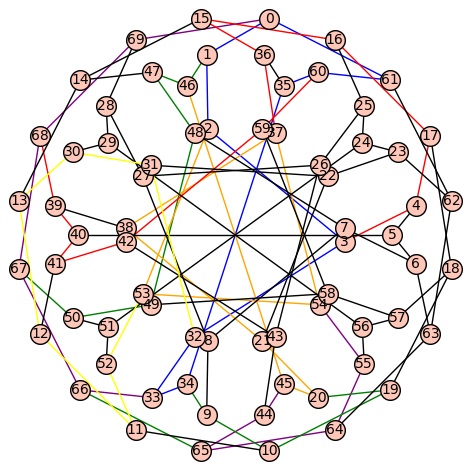

In [54]:
viz_cycles = [
    [0, 1, 2, 3, 32, 33, 34, 35, 60, 61, 0], 
    [0, 1, 2, 3, 32, 33, 66, 67, 68, 69, 0], 
    [0, 61, 60, 59, 42, 41, 40, 39, 68, 69, 0], 
    [0, 69, 68, 67, 50, 49, 48, 47, 46, 1, 0], 
    [1, 46, 45, 20, 21, 38, 37, 54, 53, 2, 1], 
    [2, 53, 52, 11, 12, 13, 30, 31, 32, 3, 2], 
]

def is_in_cycle(e, cycle):
    try:
        i = cycle.index(e[0])
        j = cycle.index(e[1])

        if abs(i - j) == 1 or abs(i - j) == 9:
            return True
        else:
            return False
    except ValueError:
        return False

for e in g.edges():
    if is_in_cycle(e, viz_cycles[0]):
        g.set_edge_label(e[0], e[1], 1)
    elif is_in_cycle(e, viz_cycles[1]):
        g.set_edge_label(e[0], e[1], 2)
    elif is_in_cycle(e, viz_cycles[2]):
        g.set_edge_label(e[0], e[1], 3)
    elif is_in_cycle(e, viz_cycles[3]):
        g.set_edge_label(e[0], e[1], 4)
    elif is_in_cycle(e, viz_cycles[4]):
        g.set_edge_label(e[0], e[1], 5)
    elif is_in_cycle(e, viz_cycles[5]):
        g.set_edge_label(e[0], e[1], 6)

g.plot(edge_colors=g._color_by_label({0: "black", 1: "blue", 2: "purple", 3: "red", 4: "green", 5: "orange", 6: "yellow"})).show()